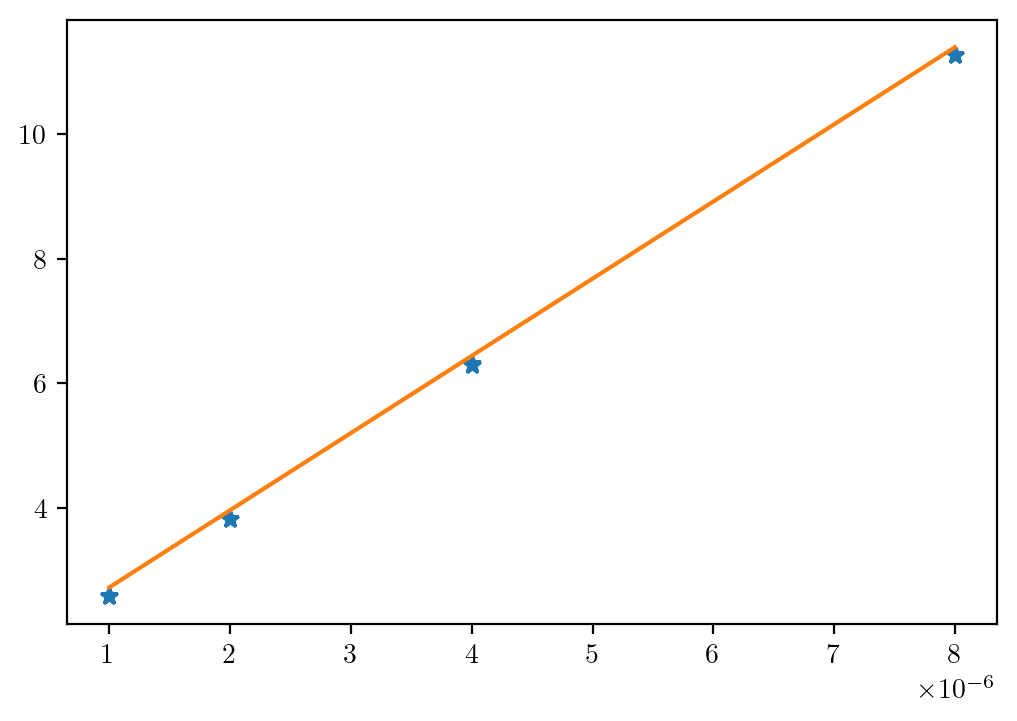

In [226]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import csv

rcParams["figure.dpi"] = 200
rcParams["text.usetex"] = True

post_proc_dir = "Study/"
ParameterStudies_dir=sorted(os.listdir(post_proc_dir))

#height
CFDheights= np.array([1e-6,2e-6,4e-6,8e-6])
CFDheights=np.tile(CFDheights,(1,9))
#CFDtorque
CFDtorques=[]
for Parameterstudy_dir in ParameterStudies_dir:
    study_path=os.path.join(post_proc_dir,Parameterstudy_dir)
    data_path=os.path.join(study_path,"postProcessing/forces/0/moment.dat")
    torque = pd.DataFrame(pd.read_csv(data_path ,header=None,skiprows=3,delimiter="\t"))
    CFDtorque=torque[0].str.split(" ")
    CFDtorque=1/(180*float(CFDtorque[len(CFDtorque)-1][-1]))
    CFDtorques=np.append(CFDtorques,CFDtorque)

#exactTorque 
#parameters
height=np.linspace(1e-6,8e-6,100)
R=32e-3
lambdaB=600e-9
lambdaT=600e-9
omega=12.566
mu=0.039
# Define the analytic velocity function
def calc_exact_torque(H,R, lambdaB, lambdaT, omega,mu):
    # TODO(HBG): implement 
    return 1/(np.pi/2*omega*R**4*mu/(H+lambdaB+lambdaT))

exactTorque=[]
for H in height:
    exactTorque=np.append(exactTorque,calc_exact_torque(H, R, lambdaB, lambdaT, omega,mu))
    
    
plt.plot(np.transpose(CFDheights),CFDtorques,'*')
plt.plot(height,exactTorque)
